## Visualize AU-ROC and Average Precision across proportion of positives
AU-ROC is insensitive to proportion of positives, AP is not

In [48]:
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
from matplotlib import pyplot as plt
def figsize(w,h):
    plt.rcParams['figure.figsize']=[w,h]
figsize(5,3)
%config InlineBackend.figure_format = 'retina'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

let's start with a classifier that only produces 0s or 1s, at some fixed false positive or false negative rate

Note how the area under the ROC curve (AUROC) is constant across proportion of positives while average precision (area under PR curve) increases.

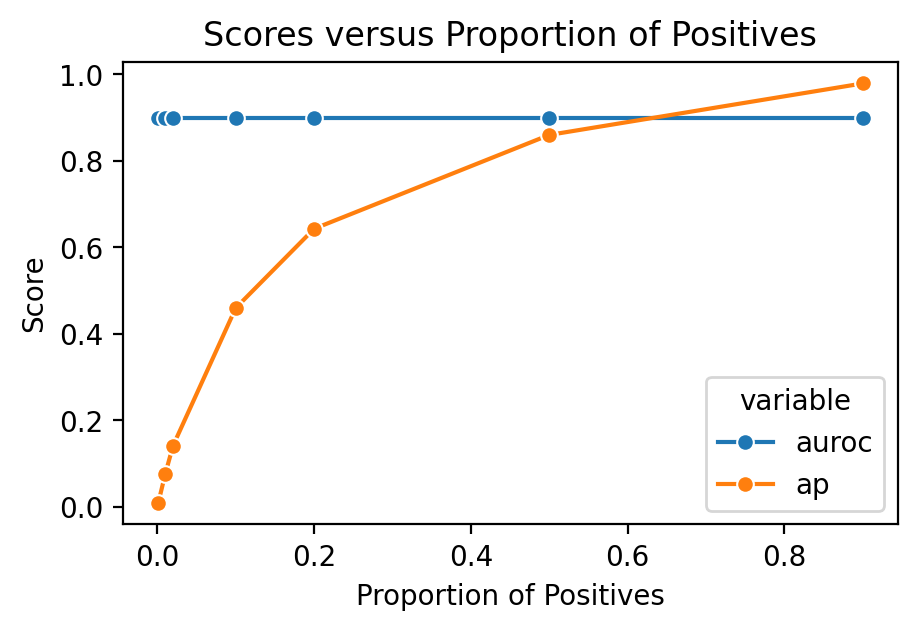

In [49]:
roc = []
ap = []
proportion_positive = []
N = 10000 # number of audio clip samples
positives = (10, 100, 200, 1000, 2000, 5000, 9000) # number of positive samples, try each of these to see how metrics change
fp_rate = 0.1 # false positive rate: probability of negative clip being classified as positive
fn_rate = 0.1 # false negative rate: probability of positive clip being classified as negative


for p in positives:
    proportion_positive.append(p / N)
    # establish ground truth labels of 0 for absent, 1 for present
    labels = np.concatenate([np.zeros(N - p), np.ones(p)])

    scores = np.concatenate(
        [
            np.zeros(int((1-fp_rate) * (N-p))),
            np.ones(int(fp_rate * (N-p))),
            np.zeros(int(fn_rate * p)),
            np.ones(int((1-fn_rate) * p)),
        ]
    )
    roc.append(roc_auc_score(labels, scores))
    ap.append(average_precision_score(labels, scores))

import seaborn as sns
data = pd.DataFrame({"proportion_positive": proportion_positive, "auroc": roc, "ap": ap})
sns.lineplot(
    data=data.melt(id_vars="proportion_positive"),
    x="proportion_positive",
    y="value",
    hue="variable",
    marker="o",
)
plt.xlabel("Proportion of Positives")
plt.ylabel("Score")
plt.title("Scores versus Proportion of Positives")
plt.show()

Now, let's allow the scores for positives and negatives to be drawn from a distribution. The False positive and False negative expectations will still be constant for any given score, but each clips' score is drawn from a normal distribution - as visualized for three different proportions of positive clips.

Note how just like above, AUROC is constant across proportion of positives while average precision increases.

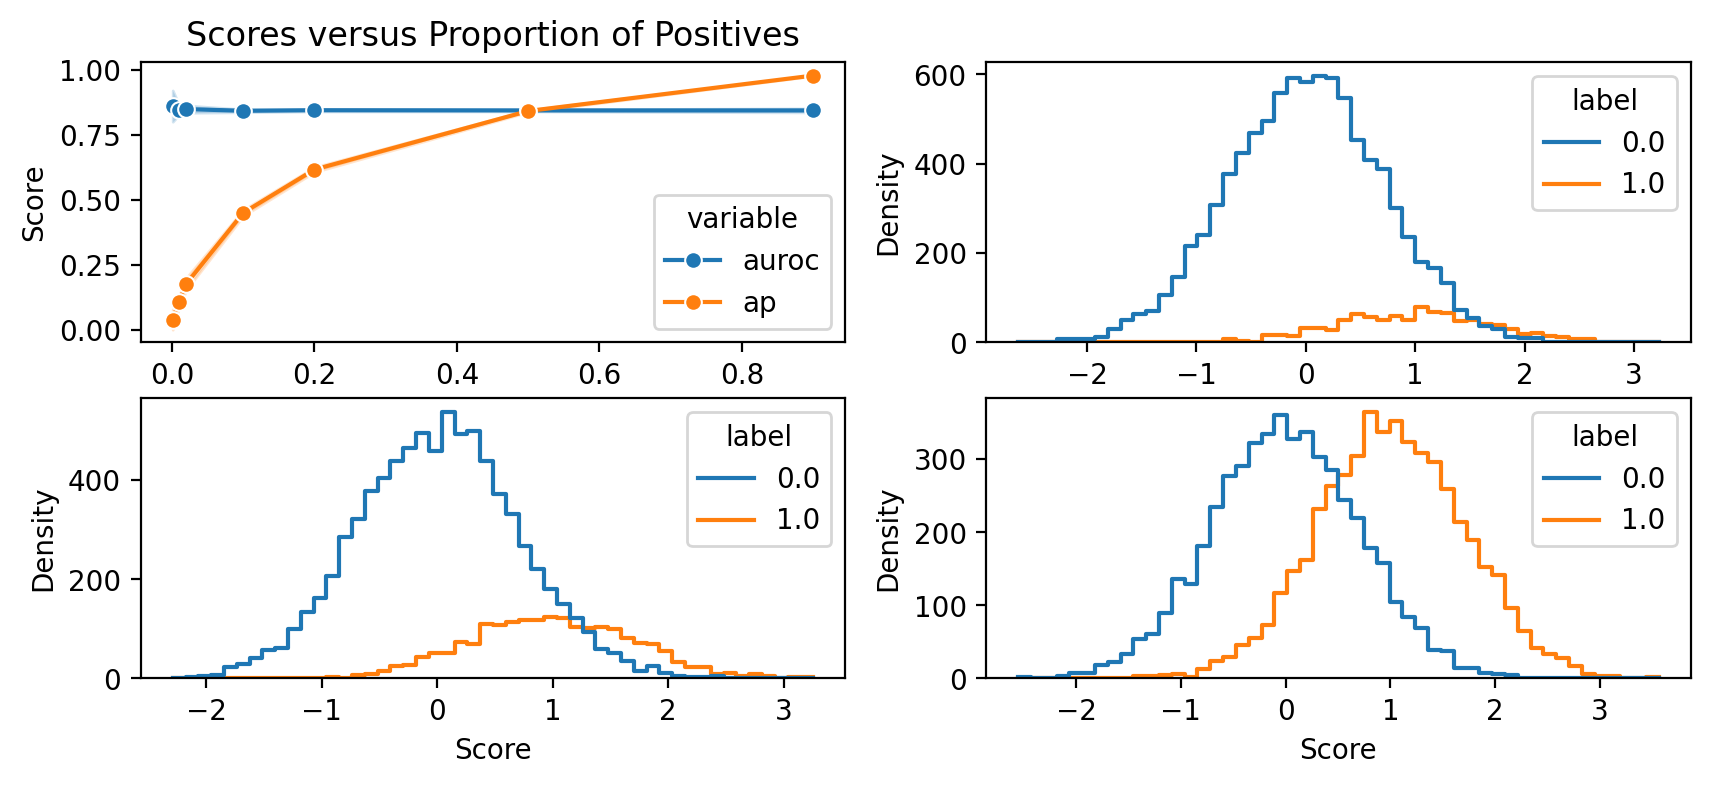

In [50]:
import seaborn as sns
fig, axs=plt.subplots(2,2, figsize=(10,4))
axs=axs.flatten()
# histogram of scores for different proportions of positives
for i,p in enumerate((1000,2000, 5000)):
    labels = np.concatenate([np.zeros(N - p), np.ones(p)])
    scores = np.concatenate(
        [
            np.random.normal(0, 0.7, N - p),
            np.random.normal(1, 0.7, p),
        ]
    )
    sns.histplot(data=pd.DataFrame({"score": scores, "label": labels}), x="score", hue="label", common_norm=False, bins=50, ax=axs[1+i], element="step", fill=False)
    # axs[1+i].set_title(f"Proportion positive: {p/N:.3f}")
    axs[1+i].set_xlabel("Score")
    axs[1+i].set_ylabel("Density")


roc = []
ap = []
proportion_positive = []
N = 10000
positives = (10, 100, 200, 1000, 2000, 5000, 9000) # number of positive samples, try each of these to see how metrics change

for i in range(30):

    for p in positives:
        proportion_positive.append(p / N)
        labels = np.concatenate([np.zeros(N - p), np.ones(p)])

        # scores = np.random.uniform(0, 1, len(labels))
        scores = np.concatenate(
            [
                np.random.normal(0, 0.7, N - p),
                np.random.normal(1, 0.7, p),
            ]
        )
        roc.append(roc_auc_score(labels, scores))
        ap.append(average_precision_score(labels, scores))


data = pd.DataFrame({"proportion_positive": proportion_positive, "auroc": roc, "ap": ap})
sns.lineplot(
    data=data.melt(id_vars="proportion_positive"),
    x="proportion_positive",
    y="value",
    hue="variable",
    errorbar="sd",
    marker="o",
    ax=axs[0],
)

axs[0].set_xlabel("Proportion of Positives")
axs[0].set_ylabel("Score")
axs[0].set_title("Scores versus Proportion of Positives")
pass